*Demostracion consultas SQL*

En este notebook se hace la demostracion del uso del lenguaje SQL para realizar consultas de una base de datos. Usaremos un Jupyter notebook para simular lo que se haria en un sistema manejador de bases de datos como MySQL. Supongamos que se tiene una tienda de venta de celulares llamada Demostracion S.A. de C.V. Dicha tienda tiene una base de datos relacional para llevar registro de las ventas de sus mercancias. En la siguiente celda se muestra el Diagrama Entidad Relacion de esta base de datos. Tenemos 4 entidades: ticket, cliente, celuar, direccion. La entidad celular tiene toda la informacion de los celulares vendidos por la tienda, la entidad cliente tiene la informacion de los clientes y se apoya de la entidad direccion que tiene las direcciones de los clientes. Por ultimo la entidad ticket tiene la informaciones de los clientes y el producto que compraron, junto con la fecha de compra.  

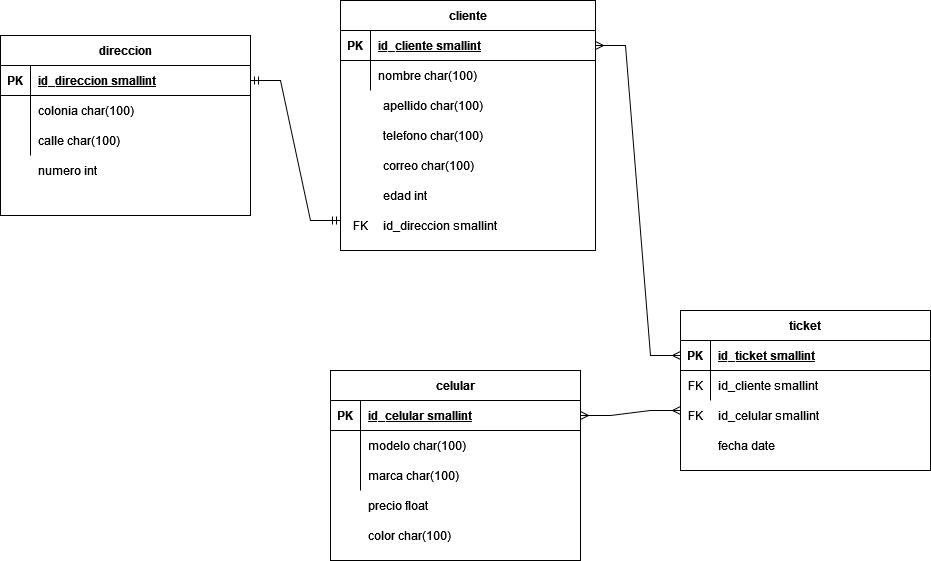

In [1]:
#Mostramos el diagrama DER. 
from IPython import display
display.Image('DER.png')

Asi pues, haremos algunas consultas sobre esta base de datos. Pero primero necesitamos cargar la informacion. 

In [64]:
#Cargamos la informacion
import pandas as pd

cliente = pd.read_csv('cliente.csv')
direc = pd.read_csv('direccion.csv')
celular = pd.read_csv('celular.csv')
ticket = pd.read_csv('ticket.csv')

Consulta 1. Obtener la marca, modelo y color del celular mas caro.

In [65]:
import sqldf

preconsulta = sqldf.run('select max(precio) from celular')
valor_preconsulta = preconsulta.iloc[0,0]
consulta1 = sqldf.run('select marca, modelo, color from celular where precio = ' + str(valor_preconsulta))

In [66]:
consulta1

,marca,modelo,color
0,Apple,WIO-287,gris


De tal suerte que vemos que el celular mas caro es un Apple modelo WIO-287 en color gris. 

Consulta2. Mostrar toda la informacion de las direcciones culla calle empieza con la letra T.

In [67]:
#Realizamos la consulta 2. 
consulta2 = sqldf.run('select * from direc where calle like "T%"')

In [68]:
consulta2

,index,id_direccion,colonia,calle,num
0,1,2,Juarez,Tabacalera,34
1,3,4,Iztapalapa,Tecnicos y Manuales,5


Vemos que hay dos personas cuya calle empieza con la letra T.

Consulta 3. Mostrar nombre y edad del cliente junto con precio y color del celular comprados el dia 2019-12-23.

In [69]:
#Hacemos la consulta 3. 
consulta3 = sqldf.run('select nombre, edad, precio, color from ticket left join celular on ticket.id_celular = celular.id_celular left join cliente on ticket.id_cliente = cliente.id_cliente where fecha = "2019-12-23"')

In [70]:
consulta3

,nombre,edad,precio,color
0,Omar,22,3500,azul
1,Lizbeth,36,10000,gris
2,Aldo,28,3500,azul
3,Juan,18,5000,negro


Asi, tenemos 4 compras relizadas el dia 2019-12-23 y fueron un celular de 10,000, dos de 3,500 y uno de 5,000. 

Consulta 4. Mostrar el total de ventas del dia 2022-05-20.

In [80]:
#Hacemos la consulta 4. 

consulta4 = sqldf.run('select sum(precio) from ticket left join celular on ticket.id_celular = celular.id_celular where fecha = "2022-05-20"')

In [81]:
consulta4

,sum(precio)
0,28000


Vemos que el total de ventas fue de 28,000. 

Consulta 5. Mostrar el nombre y colonia, junto con el dia de la compra del celular mas caro. 

In [94]:
preconsulta2 = sqldf.run('select max(precio) from celular')
valor_preconsulta2 = preconsulta.iloc[0,0]
consulta5 = sqldf.run('select nombre, colonia, fecha from ticket left join celular on ticket.id_celular = celular.id_celular left join cliente on ticket.id_cliente = cliente.id_cliente left join direc on cliente.id_direccion = direc.id_direccion where precio = ' + str(valor_preconsulta2))

In [95]:
consulta5

,nombre,colonia,fecha
0,Lizbeth,Juarez,2019-12-23
1,Lizbeth,Juarez,2022-05-20
2,Juan,Iztapalapa,2021-03-16


Asi, podemos ver que la compra del celular mas caro fue hecha en 3 ocaciones, por dos personas distintas y cada una de las comprar en dias diferentes.
Con estas consultas termina la demostracion de SQL.